# Parsing 
Covers examples for parsing of TGA data from multiple manufacturers.

## General
To import any type of TGA data, the parse_TGA function can be used

Manufacturer:  Mettler Toledo


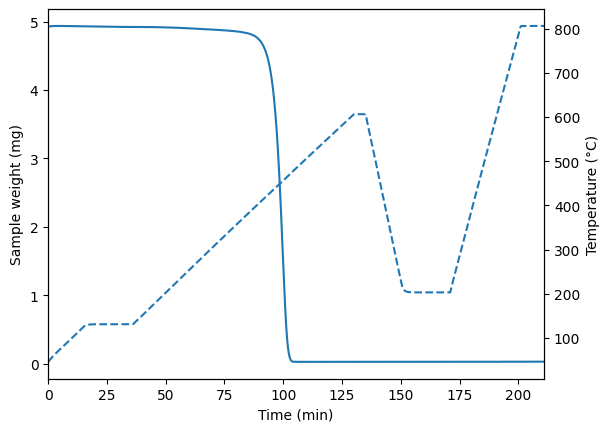

In [21]:
import pyTGA as tga
import os
data_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'example_data'))
my_exp_MT = tga.parse_TGA(os.path.join(data_dir, 'manufacturers', 'MettlerToledo_example_file.txt'))
my_exp_PE = tga.parse_TGA(os.path.join(data_dir, 'manufacturers', 'PerkinElmer_example_file.txt'))
print('Manufacturer: ', my_exp_MT.manufacturer)
my_exp_MT.quickplot()

However, its more efficient to use the designated function for each manufacturer:

In [22]:
# for MT
my_exp_MT = tga.parse_MT(data_dir + '/manufacturers/MettlerToledo_example_file.txt')
# for PE
my_exp_PE = tga.parse_PE(data_dir + '/manufacturers/PerkinElmer_example_file.txt')

## Perking Elmer

The Perkin Elmer file contains addtional information with the correct export settings. For example the method and calibration data, which allows to quickly verify both between files.

In [23]:
print(my_exp_PE.method)
print(my_exp_PE.calibration)

Method: 
Start the Run 
	Action occurs Immediately 
Switch the Gas to Nitrogen at 45.0 ml/min  
	Action occurs Immediately 
1)	Hold for 1.0 min at 50.00°C 
 
2)	Heat from 50.00°C to 130.00°C at 5.00°C/min 
 
3)	Hold for 20.0 min at 130.00°C 
 
4)	Heat from 130.00°C to 600.00°C at 5.00°C/min 
 
5)	Hold for 5.0 min at 600.00°C 
 
6)	Cool from 600.00°C to 50.00°C at 500.00°C/min 
 
7)	Hold for 20.0 min at 50.00°C 
 
8)	Heat from 50.00°C to 800.00°C at 20.00°C/min 
		Switch the Gas to Oxygen at 45.0 ml/min  
			Action occurs Immediately 
 
9)	Heat from 800.00°C to 1000.00°C at 100.00°C/min 
 
10)	Hold for 5.0 min at 1000.00°C 
		Switch the Gas to Nitrogen at 45.0 ml/min  
			Action occurs Immediately 
 

Calibration:
Calibration Type:    	Multi-point Calibration 
 
Ref. Material	Exp. Onset(°C)	Meas. Onset(°C)(at Rate1)	Meas. Onset(°C)(at Rate2) 
Alumel          	     154.200	             162.360		             165.650		Used 
Nickel          	     355.300	             359.690		             3

The file is also divided into sections, allowing to extract the indivudal stages of the experiment quickly:

In [24]:
print(my_exp_PE.stage_names())
print(my_exp_PE.stages['stage4'].head(3))

['stage1', 'stage2', 'stage3', 'stage4', 'stage5', 'stage6', 'stage7', 'stage8', 'stage9', 'stage10']
        Time  Unsubtracted weight  Baseline weight  Program Temp.  \
0  36.900000             6.924197              0.0          130.0   
1  36.916667             6.924231              0.0          130.0   
2  36.933333             6.924265              0.0          130.0   

   Sample Temp.  Sample Purge Flow  Balance purge flow  
0         130.0               44.9                70.0  
1         130.0               44.8                70.0  
2         130.0               44.9                70.0  


## Mettler Toledo
The Mettler Toledo file does not have the above mentioned features.

In [25]:
print(my_exp_MT.method)
print(my_exp_MT.calibration)
print(my_exp_MT.stage_names())

None
None
['stage1']


To split the MT file into stages, a dict or csv file with indices for the individual stages needs to be supplied. The name of the stages can be customized.

In [26]:
# using a dict
stage_split_dict = {'stage1': {'start_index': 0, 'end_index': 100},'second_stage': {'start_index': 100, 'end_index': 200}}
my_exp_MT_split = tga.parse_MT(data_dir + '/manufacturers/MettlerToledo_example_file.txt', stage_split=stage_split_dict)
print('with dict: ', my_exp_MT_split.stage_names())

# using a file
my_exp_MT_split = tga.parse_MT(data_dir+ '/manufacturers/MettlerToledo_example_file.txt', stage_split=stage_split_dict)
print('with dict: ', my_exp_MT_split.stage_names())

# using a file
my_exp_MT_split = tga.parse_MT(data_dir+ '/manufacturers/MettlerToledo_example_file.txt', stage_split=data_dir + '/stage_split_example.csv')

print('with csv: ',my_exp_MT_split.stage_names())

with dict:  ['stage1', 'second_stage']
with dict:  ['stage1', 'second_stage']
with csv:  ['stage1', 'stage2', 'stage3']
